# Ames Housing Machine Learning Kaggle Challenge, v3

My inital attempt at creating an effective model was completed in "Housing Pricesv2 - Kaggle ML.ipnb". Here I will attempt o improve upon that model with addtional editing, wrangling and fine-tuning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
%matplotlib inline

In [2]:
train = pd.read_csv('Desktop/Python Files/house-prices-advanced-regression-techniques/train.csv')
challenge = pd.read_csv('Desktop/Python Files/house-prices-advanced-regression-techniques/test.csv')

In [3]:
pd.set_option("max_columns", None) 

In [4]:
train_clean = dabl.clean(train, verbose=1)

Detected feature types:
3 float, 35 int, 43 object, 0 date, 0 other
Interpreted as:
continuous      19
dirty_float      0
low_card_int     6
categorical     43
date             0
free_string      0
useless         13
dtype: int64


/opt/anaconda3/lib/python3.7/site-packages/dabl/preprocessing.py:318: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 'GarageQual', 'GarageCond', '3SsnPorch', 'PoolArea', 'MiscVal']
  near_constant.index[near_constant].tolist()))


In [5]:
train_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,NaN,NaN,NaN,12,2008,WD,Normal,250000


In [6]:
train_clean_types = dabl.detect_types(train_clean)
train_clean_types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
MSSubClass,False,False,True,False,False,False,False
MSZoning,False,False,False,True,False,False,False
LotFrontage,True,False,False,False,False,False,False
LotArea,True,False,False,False,False,False,False
Alley,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
MoSold,False,False,True,False,False,False,False
YrSold,False,False,False,True,False,False,False
SaleType,False,False,False,True,False,False,False
SaleCondition,False,False,False,True,False,False,False


In [7]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Alley          91 non-null     category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   LotConfig      1460 non-null   category
 8   LandSlope      1460 non-null   category
 9   Neighborhood   1460 non-null   category
 10  Condition1     1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  OverallQual    1460 non-null   int64   
 14  OverallCond    1460 non-null   int64   
 15  YearBuilt      1460 non-null   int64   
 16  YearRemodAdd   1460 non-null   int64   
 17  RoofStyle      1460 non-null   ca

Target looks like regression
Showing only top 10 of 22 continuous features
Showing only top 10 of 45 categorical features


/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 3 outliers in column GrLivArea.
  int(dropped), series.name), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column TotalBsmtSF.
  int(dropped), series.name), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 3 outliers in column 1stFlrSF.
  int(dropped), series.name), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 2 outliers in column MasVnrArea.
  int(dropped), series.name), UserWarning)


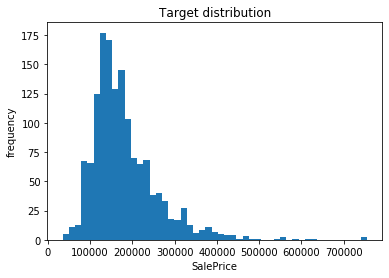

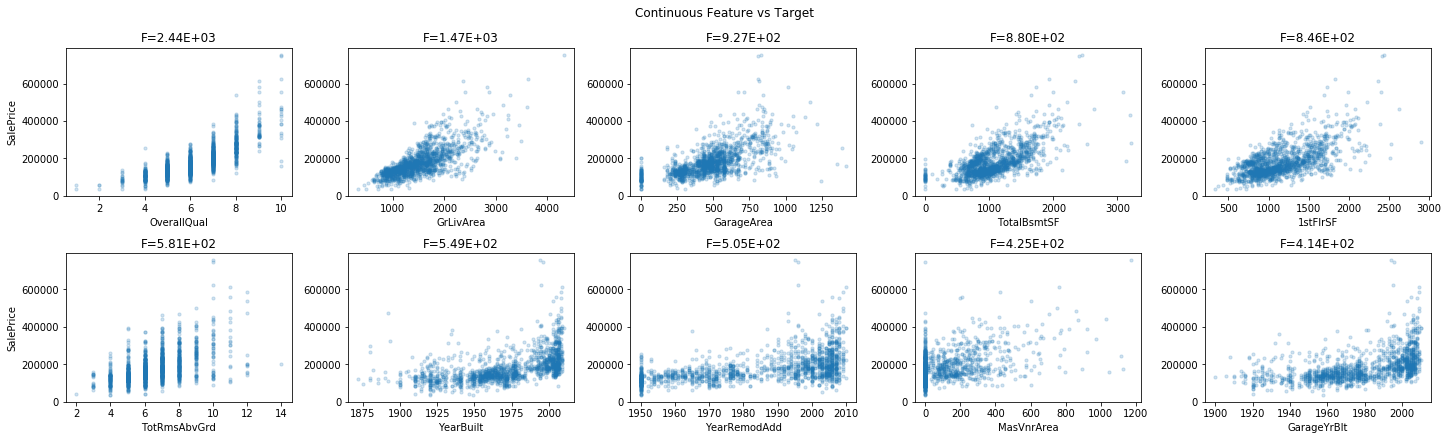

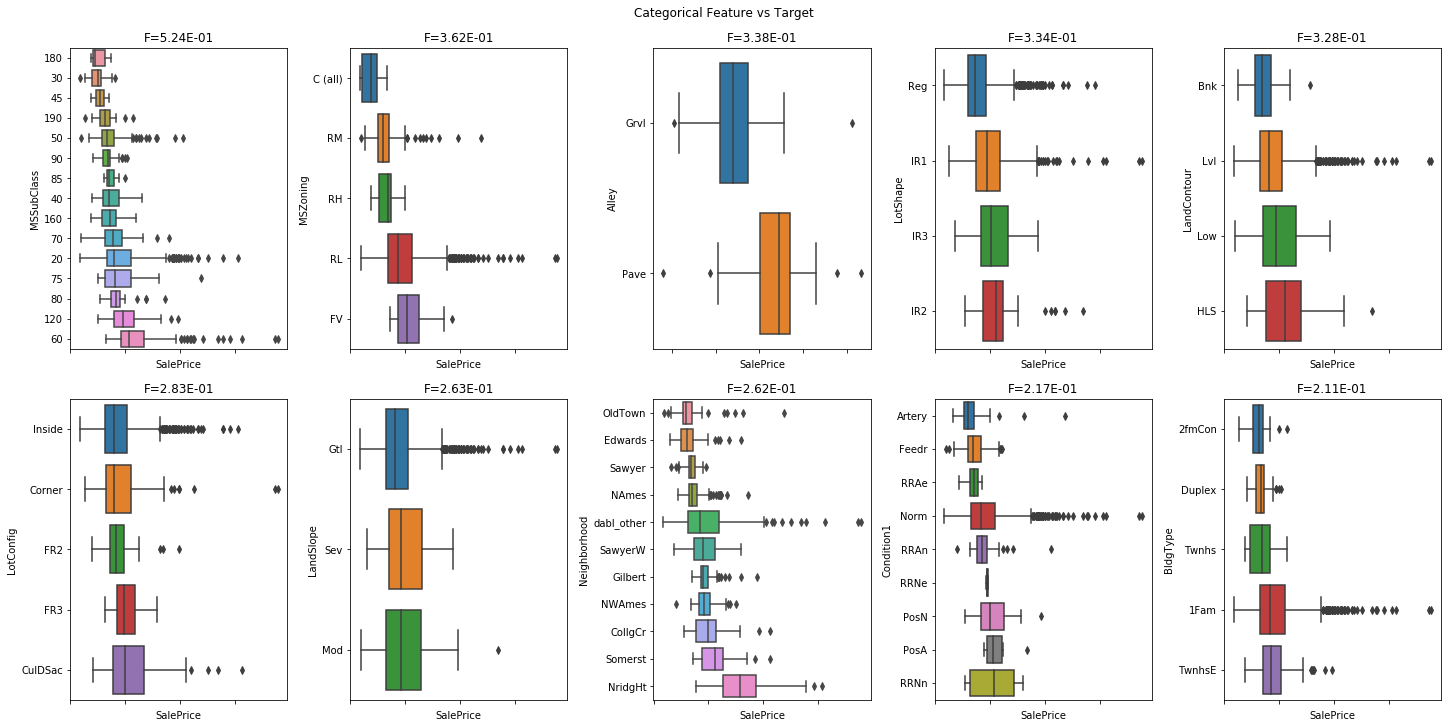

In [8]:
dabl.plot(train_clean, target_col='SalePrice')

In [9]:
# Previously dropped columns in v2:

#prev_dropped = ['HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr',
#        'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
#        'MiscVal', 'BsmtHalfBath', 'LowQualFinSF', 'YrSold', 'OverallCond',
#        'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', '2ndFlrSF', 'MasVnrArea', 
#         'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1', 'LotFrontage''Street', 
#                 'Alley', 'Utilities', 'Condition1', 'Condition2',
#                  'RoofMatl', 'Heating', 'BldgType', 'PoolQC', 'Fence', 'MiscFeature',
#                  'LandContour', 'LandSlope', 'ExterCond', 'FireplaceQu']

# Previously dropped 2/2 to failure to align train/test get_dummies

#drop_annoying = ['HouseStyle', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Electrical', 'MSZoning', 'Functional']

## Null Values:

Text(0.0, 1, 'Heatmap of Train Null Values')

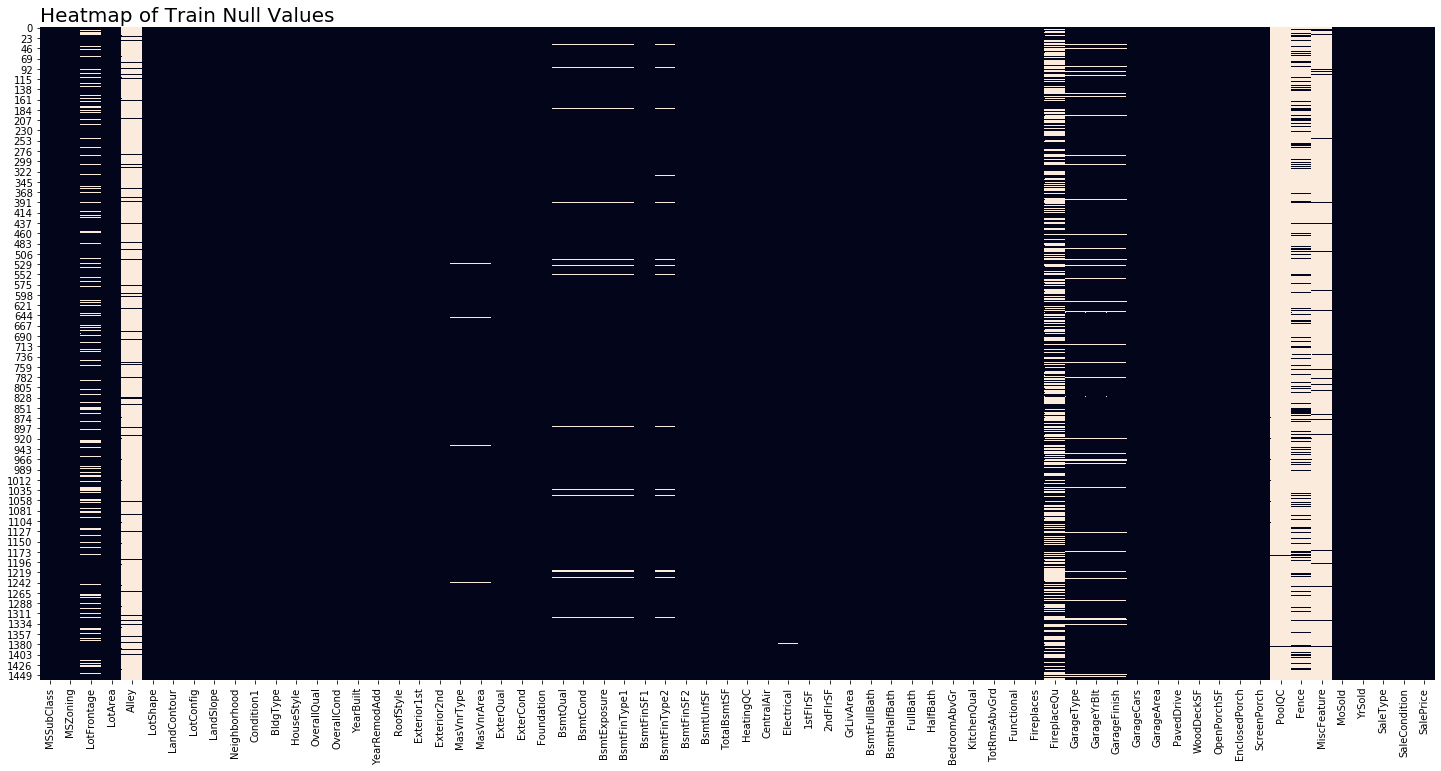

In [10]:
f, ax = plt.subplots(figsize = (25,12))
chart = sns.heatmap(train_clean.isnull(), cbar=False)
ax.set_title('Heatmap of Train Null Values', loc='left', fontdict={"fontsize":20})

### Before any more feature removal, lets drop the primarily empty columns

In [11]:
train_clean.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
BsmtFinType2      38
dtype: int64

In [12]:
train_clean = train_clean.dropna(axis=1, thresh=500)

Text(0.0, 1, 'Heatmap of Train Null Values')

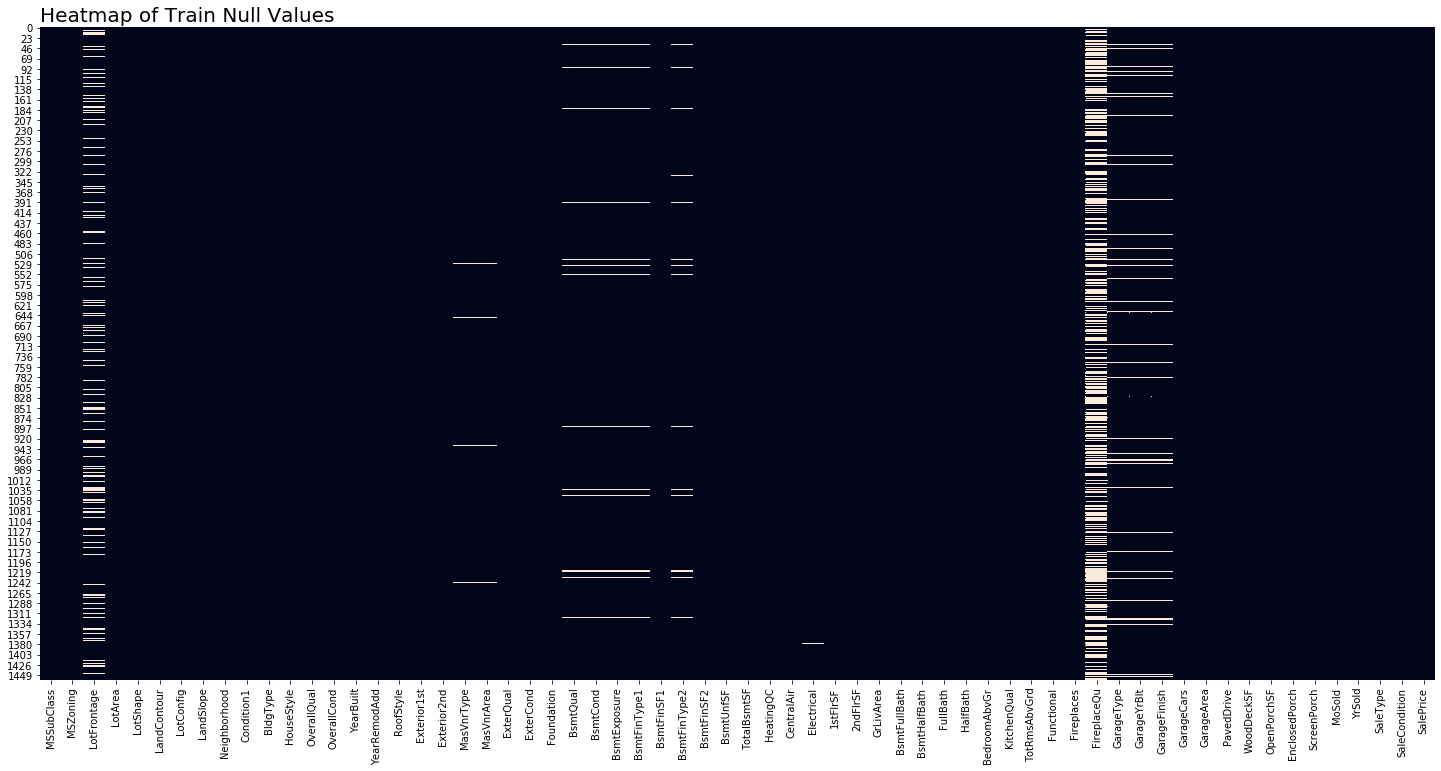

In [13]:
f, ax = plt.subplots(figsize = (25,12))
chart = sns.heatmap(train_clean.isnull(), cbar=False)
ax.set_title('Heatmap of Train Null Values', loc='left', fontdict={"fontsize":20})

So why didn't `FireplaceQu` or `LotFrontage` drop?

In [14]:
train_clean['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [15]:
train_clean = train_clean.drop(columns = ['FireplaceQu', 'LotFrontage'])

In [16]:
train_clean.shape

(1460, 62)

In [17]:
train_clean.isnull().sum().sort_values(ascending=False).head(15)

GarageYrBlt     81
GarageType      81
GarageFinish    81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
SalePrice        0
Exterior2nd      0
ExterQual        0
RoofStyle        0
dtype: int64

## Lets fill in some of the missing values

Because the columns were typed as catergories and not objects, fillna operates differently. OBjects is much easier to perform fillna (no adding value first), but categories are faster in function

In garage let's keep them categorical for the fillna, and for basment let's change type

In [18]:
# Missing garage values--ie, no garage

garage_cols = ['GarageType', 'GarageFinish']
train_clean['GarageType'] = train_clean['GarageType'].cat.add_categories('None')
train_clean['GarageFinish'] = train_clean['GarageFinish'].cat.add_categories('None')
train_clean[garage_cols] = train_clean[garage_cols].fillna('None')

garage_zero =['GarageYrBlt']
train_clean[garage_zero] = train_clean[garage_zero].fillna(0)

In [19]:
# Missing Basement values--for homes with no basement

bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
train_clean[bsmt_cols] = train_clean[bsmt_cols].astype('object')
train_clean[bsmt_cols] = train_clean[bsmt_cols].fillna('None')


#### OK, what about the other few: `MasVnrArea`, `MasVnrType`, and `Electrical`?

In [20]:
train_clean['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
train_clean = train_clean.drop(columns = 'Electrical')

In [22]:
train_clean['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

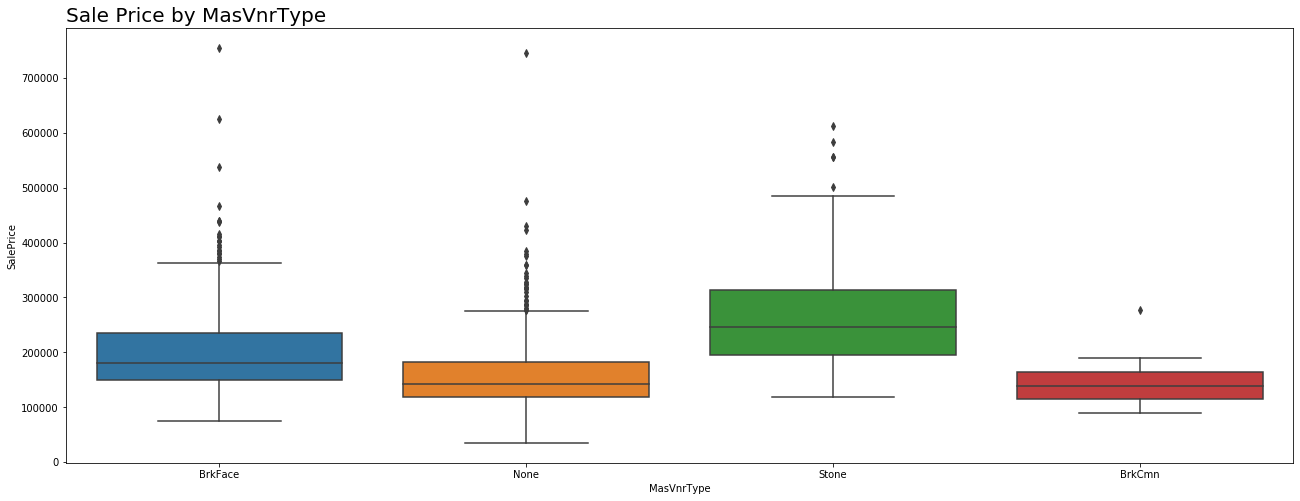

In [23]:
def plot_house(a):
    df = train
    x = train['SalePrice']
    y = train[a]
    f, ax = plt.subplots(figsize=(22,8))
    chart = sns.boxplot(y, x)
    ax.set_title("Sale Price by " + a, loc='left', fontdict={'fontsize':20})
    
plot_house('MasVnrType')

In [24]:
train_clean['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [25]:
train_clean['MasVnrType'] = train_clean['MasVnrType'].fillna('None')
train_clean['MasVnrArea'] = train_clean['MasVnrArea'].fillna(0)

#### Let's also drop some columns that wouldn't be available to an model pre-sale:

In [26]:
train_clean = train_clean.drop(columns=['MoSold', 'YrSold', 'SaleCondition', 'SaleType'])

#### How are the null values now?

In [27]:
train_clean.isnull().sum().sort_values(ascending=False).head(15)

SalePrice       0
BsmtFinSF1      0
BsmtExposure    0
BsmtCond        0
BsmtQual        0
Foundation      0
ExterCond       0
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofStyle       0
YearRemodAdd    0
YearBuilt       0
dtype: int64

In [28]:
train_clean.shape

(1460, 57)

In [29]:
challenge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [30]:
challenge = challenge.set_index('Id')

#### Updating challenge df to match:

In [31]:
cols_drop = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating',
          'LowQualFinSF', 'KitchenAbvGr', 'GarageQual', 'GarageCond',
          '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
          'SaleCondition', 'SaleType', 'Electrical', 'FireplaceQu',
            'LotFrontage']

challenge = challenge.drop(columns=cols_drop)

challenge = challenge.dropna(axis=1, thresh=300)

garage_cols = ['GarageType', 'GarageFinish']
#challenge['GarageType'] = challenge['GarageType'].cat.add_categories('None')
#challenge['GarageFinish'] = challenge['GarageFinish'].cat.add_categories('None')
challenge[garage_cols] = challenge[garage_cols].fillna('None')

garage_zero =['GarageYrBlt']
challenge[garage_zero] = challenge[garage_zero].fillna(0)

bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
#challenge[bsmt_cols] = challenge[bsmt_cols].astype('object')
challenge[bsmt_cols] = challenge[bsmt_cols].fillna('None')

challenge['MasVnrType'] = challenge['MasVnrType'].fillna('None')
challenge['MasVnrArea'] = challenge['MasVnrArea'].fillna(0)

num_cols = challenge.select_dtypes(include=['int64', 'float']).columns
cat_cols = challenge.select_dtypes(include=['object']).columns
challenge[num_cols] = challenge[num_cols].fillna(0)
challenge[cat_cols] = challenge[cat_cols].fillna('None')
challenge[num_cols] = challenge[num_cols].astype('int64')

In [32]:
challenge.isnull().sum().sort_values(ascending=False).head()

ScreenPorch      0
EnclosedPorch    0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
dtype: int64

Had some trouble in the final predict, `challenge` had some NaN values

In [33]:
print(train_clean.shape)
print(challenge.shape)

(1460, 57)
(1459, 56)


In [34]:
print(train_clean.columns)
print(challenge.columns)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')
Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'L

In [35]:
print(train_clean['GarageCars'].value_counts())
print(challenge['GarageCars'].value_counts())

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
2    770
1    407
3    193
0     77
4     11
5      1
Name: GarageCars, dtype: int64


In [36]:
cols_drop_dup = ['FullBath', 'HalfBath', 'Fireplaces', 'BsmtHalfBath', 'BsmtFullBath', 'Exterior1st', 'GarageCars', 'HouseStyle', 'Exterior2nd', 'Condition1']

train_clean = train_clean.drop(columns=cols_drop_dup)
challenge = challenge.drop(columns=cols_drop_dup)

### Next we use get-dummies to breakout the categorical features:

In [37]:
train_updated = pd.get_dummies(train_clean)
challenge_updated = pd.get_dummies(challenge)
train_updated, challenge_updated = train_updated.align(challenge_updated, join='left', axis=1)

In [38]:
print(train_updated.shape)
print(challenge_updated.shape)

(1460, 160)
(1459, 160)


In [39]:
challenge_updated.isnull().sum().sort_values(ascending=False).head(30)

SalePrice               1459
PavedDrive_Y               0
LotConfig_Inside           0
Neighborhood_NPkVill       0
Neighborhood_NAmes         0
Neighborhood_Mitchel       0
Neighborhood_MeadowV       0
Neighborhood_IDOTRR        0
Neighborhood_Gilbert       0
Neighborhood_Edwards       0
Neighborhood_Crawfor       0
Neighborhood_CollgCr       0
Neighborhood_ClearCr       0
Neighborhood_BrkSide       0
Neighborhood_BrDale        0
Neighborhood_Blueste       0
Neighborhood_Blmngtn       0
LandSlope_Sev              0
LandSlope_Mod              0
Neighborhood_NWAmes        0
Neighborhood_NoRidge       0
Neighborhood_NridgHt       0
BldgType_2fmCon            0
RoofStyle_Hip              0
RoofStyle_Gambrel          0
RoofStyle_Gable            0
RoofStyle_Flat             0
BldgType_TwnhsE            0
BldgType_Twnhs             0
BldgType_Duplex            0
dtype: int64

In [40]:
challenge_updated.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,5,6,1961,1961,0,468,144,270,882,896,0,896,2,5,1961,730,140,0,0,120,NaN,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1462,20,14267,6,6,1958,1958,108,923,0,406,1329,1329,0,1329,3,6,1958,312,393,36,0,0,NaN,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1463,60,13830,5,5,1997,1998,0,791,0,137,928,928,701,1629,3,6,1997,482,212,34,0,0,NaN,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1464,60,9978,6,6,1998,1998,20,602,0,324,926,926,678,1604,3,7,1998,470,360,36,0,0,NaN,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0

### Time to split our data into train and test groups:

In [41]:
X = train_updated.drop('SalePrice',axis=1)
y = train_updated['SalePrice']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=15)

In [44]:
X_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,11

In [45]:
X_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.0,292.000000,292.000000,292.0,292.00000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.0

In [46]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y
1273,80,11512,6,7,1959,2006,84.0,719,0,300,1019,1357,0,1357,2,5,1959.0,312,0,0,0,163,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1396,20,57200,5,5,1948,1950,0.0,353,334,60,747,1687,0,1687,3,7,1966.0,572,0,0,50,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,3,8,2003.0,548,0,61,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
164,40,5400,6,7,1926,2004,0.0,370,0,779,1149,1149,467,1616,3,5,1926.0,216,0,0,183,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,3,7,1998.0,642,0,35,272,0,0,0,0,1,0,1,0,0,0,0,

In [47]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y
1342,60,9375,8,5,2002,2002,149.0,0,0,1284,1284,1284,885,2169,3,7,2002.0,647,192,87,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
448,50,8600,6,6,1937,1950,0.0,0,0,780,780,780,596,1376,3,7,1937.0,198,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
44,20,7945,5,6,1959,1959,0.0,179,506,465,1150,1150,0,1150,3,6,1959.0,300,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
38,20,7922,5,7,1953,2007,0.0,731,0,326,1057,1057,0,1057,3,5,1953.0,246,0,52,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1165,20,9541,7,5,2009,2009,268.0,0,0,1502,1502,1502,0,1502,3,7,2009.0,644,0,114,0,0,0,0,0,1,0,1,0,0,0,0,0,0,

### Train a model: Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred_lr = regressor.predict(X_test) #running the algorithm

Evaluate performance:

In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df1 = df.head(25)
df1

,Actual,Predicted
1342,228500,223435.225209
448,119500,106373.204569
44,141000,133800.526792
38,109000,130599.005146
1165,233170,230801.749490
469,187000,196435.360318
842,174900,166434.820001
432,122500,108629.346498
632,82500,181511.984192
257,220000,213826.830733


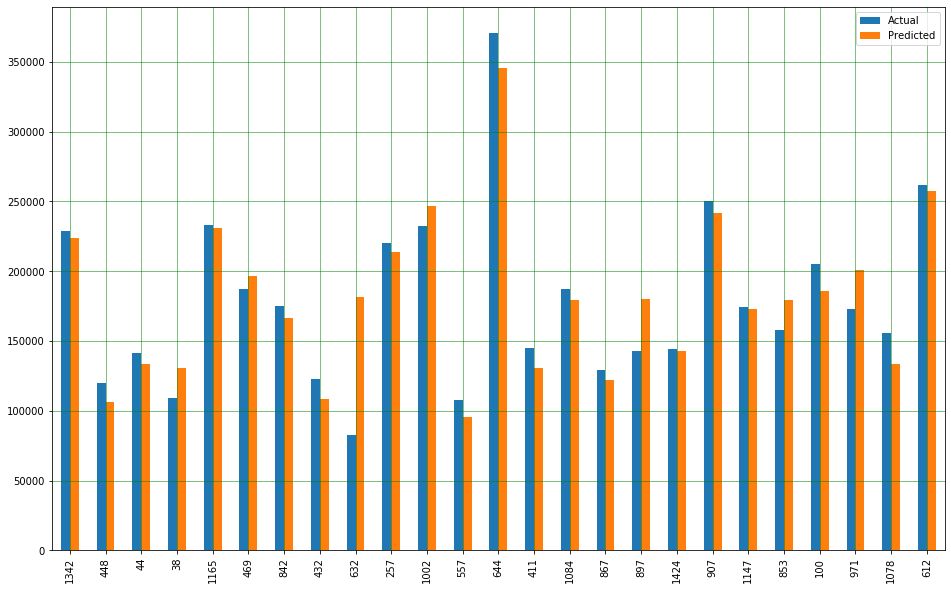

In [51]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [52]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))

Root Mean Squared Error: 26237.930319445124
Mean Absolute Error: 17716.431945827986


In [53]:
print(X.iloc[632,:])

MSSubClass              20.0
LotArea              11900.0
OverallQual              7.0
OverallCond              5.0
YearBuilt             1977.0
                      ...   
GarageFinish_Unf         0.0
GarageFinish_None        0.0
PavedDrive_N             0.0
PavedDrive_P             0.0
PavedDrive_Y             1.0
Name: 632, Length: 159, dtype: float64


#### So far this iteration of the LinearRegression performed better than in v2. Let's compare the RandomForrest as well.

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_rfr = forest_reg.predict(X_test)

In [55]:
df_rfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfr})
df_rfr = df_rfr.head(25)
df_rfr

,Actual,Predicted
1342,228500,260493.16
448,119500,120690.62
44,141000,138843.46
38,109000,137680.90
1165,233170,231082.04
469,187000,183360.00
842,174900,152247.75
432,122500,136877.83
632,82500,183848.62
257,220000,247516.09


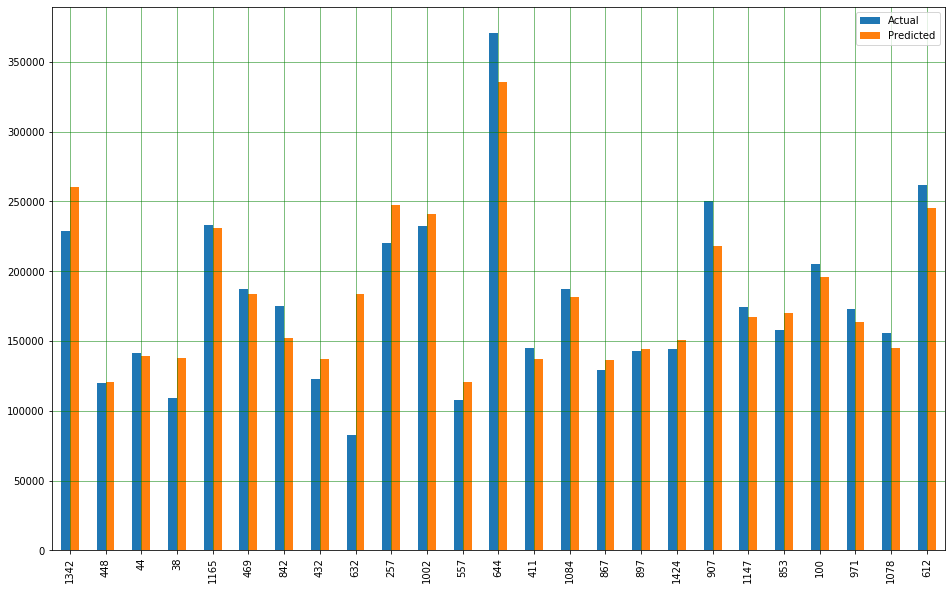

In [56]:
df_rfr.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### How do the two models compare?

In [57]:
print('Linear Regression Performance:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('')
print('Random Forest Performance:')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))

Linear Regression Performance:
Root Mean Squared Error: 26237.930319445124
Mean Absolute Error: 17716.431945827986

Random Forest Performance:
Root Mean Squared Error: 25871.466257845
Mean Absolute Error: 16784.91664383562


#### Both models now run a lower error than they did in v2, with our Linear Regression model demonstrating the biggest improvement in perfomrnce.

#### Additionally, this version appears to have a VERY slight decrease in performance over "v3 - with pipeline"

In [59]:
challenge_updated = challenge_updated.drop(columns='SalePrice')
predict_challenge = forest_reg.predict(challenge_updated)
predict_challenge

array([124825.  , 157709.5 , 177176.34, ..., 157991.  , 108706.76,
       216689.24])

In [61]:
predictdf = pd.DataFrame(predict_challenge)
predictdf = predictdf.rename(columns={0:"SalePrice"})
predictdf.head()

,SalePrice
0,124825.00
1,157709.50
2,177176.34
3,179259.32
4,195873.80


In [62]:
predictdf['Id'] = challenge.index
predictdf.set_index('Id', inplace=True)
predictdf

,SalePrice
Id,
1461,124825.00
1462,157709.50
1463,177176.34
1464,179259.32
1465,195873.80
...,...
2915,89782.93
2916,89984.00
2917,157991.00


In [63]:
results = predictdf.reset_index()
results

,Id,SalePrice
0,1461,124825.00
1,1462,157709.50
2,1463,177176.34
3,1464,179259.32
4,1465,195873.80
...,...,...
1454,2915,89782.93
1455,2916,89984.00
1456,2917,157991.00
1457,2918,108706.76


In [64]:
results[['Id','SalePrice']].to_csv('clinke1_submission_v3_nopipe.csv', index=False)